In [1]:
import matplotlib.pyplot as plt
import numpy as np
import joblib as jb
import helper_functions as hlf

%matplotlib inline

Using TensorFlow backend.


In [3]:
# load preprocessed dragonfly images
trainpath = r'D:\Linnaeus_models\dragon\train\dragon_train.npy'
testpath = r'D:\Linnaeus_models\dragon\test\dragon_test.npy'
dragons = np.concatenate((np.load(trainpath), np.load(testpath)), axis=0)
print('Number of images: {}'.format(len(dragons)))

Number of images: 18407


##  Image Denoising with CNN
   * Test image denoising abilities on the images

In [4]:
# separate into training set and validation set and reshape to fit the NN
x_train = dragons[0:16000] 
x_val = dragons[16000:]

In [5]:
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [6]:
model = hlf.create_unsupervised_model()

### Begin training

In [ ]:
# train model
train_history = model.fit(x_train, x_train, epochs=8, batch_size=100, 
                          validation_data=(x_val, x_val))
# save model
model_path =  r'D:\Linnaeus_models\dragon_reconstruction_v1.pkl'
jb.dump(loaded_model, model_path)

### Reload unsupervised model to continue training

In [7]:
# load the model
loaded_model = jb.load(r'D:\Linnaeus_models\dragon_reconstruction_v4.pkl')

In [22]:
# continue training the unsupervised model
train_history = loaded_model.fit(x_train, x_train, epochs=100, batch_size=2, 
                                 validation_data=(x_val, x_val))

# save model and weights
# loaded_model.save_weights(r'D:\Linnaeus_models\dragon_reconstruction_v4_weights')
# model_path =  r'D:\Linnaeus_models\dragon_reconstruction_v4.pkl'
# jb.dump(loaded_model, model_path)

Train on 16000 samples, validate on 2407 samples
Epoch 1/100
16000/16000 [==============================] - 239s 15ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 2/100
16000/16000 [==============================] - 252s 16ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 3/100
16000/16000 [==============================] - 252s 16ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 4/100
16000/16000 [==============================] - 261s 16ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 5/100
16000/16000 [==============================] - 259s 16ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 6/100
16000/16000 [==============================] - 259s 16ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 7/100
16000/16000 [==============================] - 263s 16ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 8/100
16000/16000 [==============================] - 261s 16ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 9/100
16000/16000 [==============================] - 263s 16ms/step - loss: 0.006

16000/16000 [==============================] - 257s 16ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 76/100
16000/16000 [==============================] - 256s 16ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 77/100
16000/16000 [==============================] - 255s 16ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 78/100
16000/16000 [==============================] - 256s 16ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 79/100
16000/16000 [==============================] - 255s 16ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 80/100
16000/16000 [==============================] - 255s 16ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 81/100
16000/16000 [==============================] - 256s 16ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 82/100
16000/16000 [==============================] - 256s 16ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 83/100
16000/16000 [==============================] - 255s 16ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 84/100
16000/16000 [======

In [23]:
# predict and save the images
preds = loaded_model.predict(x_val)
jb.dump(preds, './test_images/unsupervised_val_images1.pkl')
jb.dump(x_val, './test_images/val_images.pkl1')

['./test_images/val_images.pkl1']

In [24]:
loaded_model.save_weights(r'D:\Linnaeus_models\dragon_reconstruction_v8_weights')
model_path =  r'D:\Linnaeus_models\dragon_reconstruction_v8.pkl'
jb.dump(loaded_model, model_path)

['D:\\Linnaeus_models\\dragon_reconstruction_v8.pkl']

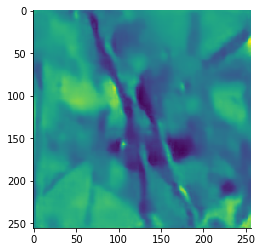

In [25]:
plt.imshow(preds[0].reshape(256, 256))

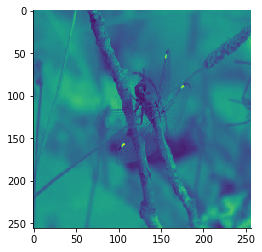

In [26]:
plt.imshow(x_val[0].reshape(256, 256))